In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.stats import gamma, norm
from scipy.misc import factorial
%matplotlib inline

In [2]:
gamma.pdf

<bound method rv_continuous.pdf of <scipy.stats._continuous_distns.gamma_gen object at 0x11252ed68>>

In [3]:
np.exp(2)

7.3890560989306504

In [4]:
-np.inf

-inf

In [5]:
factorial(4)

array(24.0)

In [1]:
def my_gamma_pdf(t, r, _lambda):

    return 1.0/factorial(r-1) *_lambda**r * t**(r-1.0) * np.exp(-(_lambda)*t)

### 7.6.4.2 Example: Network Buffer

$P(Y>552) = \int_{552}^{\infty}\frac{1}{4!}0.01^5t^4e^{-0.01t}dt$

In [7]:

quad(my_gamma_pdf, 552, np.inf, args=(5.0, 0.01))

(0.354410137439043, 2.2048120889564508e-10)

In [8]:
np.inf

inf

### Inverse Transform
$F^{-1}(U)$

In [9]:
def gen_df(func=lambda x: x**0.5, title='x**0.5'):
    df = pd.DataFrame({'random': np.random.uniform(size=100000)})
    df[title] = df['random'].apply(func)
    return df

In [10]:
df = gen_df(func=lambda x: x**0.5, title='x**0.5')

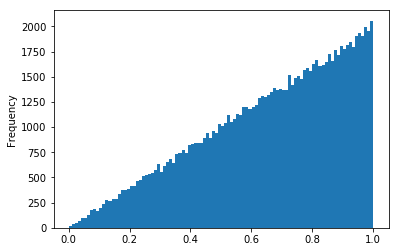

In [11]:
df['x**0.5'].plot.hist(bins=100)

In [12]:
df_1 = gen_df(func=lambda x: x**(1.0/3), title='x**(1.0/3)')

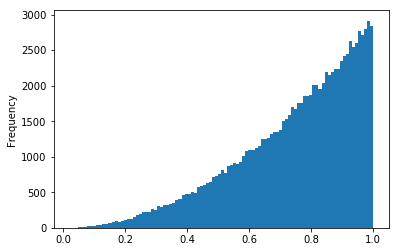

In [13]:
df_1['x**(1.0/3)'].plot.hist(bins=100)

In [14]:
normal = norm()

In [15]:
def normal_pdf(sigma=None, mu=None, bins=None):
    return 1/(sigma * np.sqrt(2 * np.pi)) \
        * np.exp( - (bins - mu)**2 / (2 * sigma**2))

In [16]:
normal_pdf(sigma=1, mu=1, bins=1) - normal_pdf(sigma=1, mu=1, bins=1)

0.0

In [17]:
def exponential_pdf(_lambda=None, input_var=None):
    return _lambda*np.exp(-_lambda*input_var)

In [18]:
def inverse_of_exponential_cdf(_lambda=None, input_var=None):
    return -np.log(1-input_var) / _lambda

In [19]:
def plot_exponential(size=1e4):
    uniform = np.random.uniform(size=1e4)
    X = inverse_of_exponential_cdf(_lambda=0.5, input_var=uniform)
    Y = exponential_pdf(_lambda=0.5, input_var=X)
    df = pd.DataFrame({'X': X, 'Y': Y})
    df.plot.scatter(x='X', y='Y', )


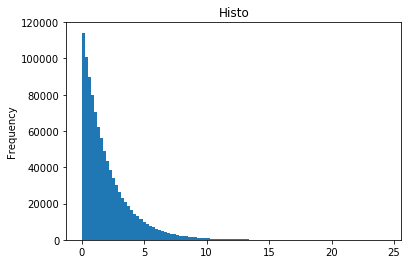

In [240]:
def plot_histo_exponential_t(size=int(1e6)):
    
    U = np.random.uniform(size=int(size))
    # inverse of the cdf
    t = inverse_of_exponential_cdf(_lambda=0.5, input_var=U)
    
    #Y = 2*t
    df = pd.DataFrame({'U': U, 't': t})
    df['t'].plot.hist(bins=100,title='Histo')

plot_histo_exponential_t()

/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


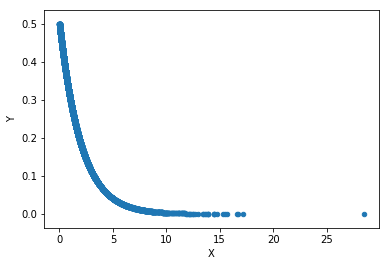

In [241]:
plot_exponential(size=1e6)

# Exercises

## 1. Fill in the blanks, in the following statements about continuous random variables to use our book's notation

### (a) $\frac{d}{dt}P(X\leq t) = f_X(t)$

### (b) $P(a<X<b) = F_X(b) - F_X(a)$

## 2. Suppose $X$ has a uniform distribution on $(-1,1)$, and let $Y=X^2$. Find $f_Y.$

\begin{equation}
  \begin{aligned}
    f_Y(t) &= \frac{d}{dt}F_Y(t) && \text{defn. of density} \\
    &= \frac{d}{dt}P(Y\leq t) && \text{defn. of cdf} \\
    &= \frac{d}{dt}P(X^2\leq t) && Y=X^2 \\
    &= \frac{d}{dt}P(-\sqrt{t} \leq X\leq \sqrt{t}) \\
    &= \frac{d}{dt}(F_X(\sqrt{t}) - F_X(-\sqrt{t})) \\
    &= \frac{d}{dt}2F_X(\sqrt{t}) \\
    &= 2f_X(\sqrt{t})\frac{d}{dt}(\sqrt{t}) \\
    &= 2\frac{1}{(1)-(-1)}\frac{d}{dt}(\sqrt{t}) && \text{$f_X(t)$ for $-1<t<1$}\\
    &= \frac{1}{2\sqrt{t}} \\
  \end{aligned}
\end{equation}



## 3. Suppose $X$ has an exponential distribution with parameter $\lambda$. Show that $EX=1/\lambda$ and $Var(X) = 1/\lambda ^2$

### $EX$:

\begin{equation}
  \begin{aligned}
    f_X(t) &= \lambda e^{-\lambda t} \\
    EX &= \int_{-\infty}^{\infty}tf_X(t)dt \\
    &= \int_{-\infty}^{\infty}t\lambda e^{-\lambda t}dt \\
    \int g df &= fg - \int fdg && \text{integration by parts}\\
    f &= e^{-\lambda t} \\
    df &= -\lambda e^{-\lambda t}dt \\
    dg &= -1dt \\
    g &= -t \\
    EX &= -te^{-\lambda t}\Big|_{0}^{\infty} - \int e^{-\lambda t}(-1dt) \\
    &= (0-0) + \int e^{-\lambda t}dt \\
  &= -\frac{1}{\lambda}e^{-\lambda t}\Big\vert_{0}^{\infty} \\
    &= -(0-\frac{1}{\lambda}e^0) \\
    &= \frac{1}{\lambda}
  \end{aligned}
\end{equation}


### $Var(X)$:

\begin{equation}
  \begin{aligned}
    Var(X) &= E(X^2) - E(X)^2 \\
    &= \int_{-\infty}^{\infty}t^2\lambda e^{-\lambda t} dt - \left(\frac{1}{\lambda}\right)^2 \\
    &= \lambda\int_{-\infty}^{\infty}t^2e^{-\lambda t} dt - \left(\frac{1}{\lambda}\right)^2 \\
    \int f dg &= fg - \int g df && \text{integration by parts}\\
    f &= t^2 \\
    df &= 2t dt \\
  dg &= e^{-\lambda t}dt \\
    g &= -\frac{1}{\lambda}e^{-\lambda t} \\
    Var(X) &= \lambda\left(-\frac{1}{\lambda}t^2e^{-\lambda t}\Big\vert_{0}^{\infty} -- \frac{2}{\lambda} \int_0^{\infty} te^{-\lambda t}dt\right) - \left(\frac{1}{\lambda}\right)^2 \\
    &= \lambda\left(-(0-0) + 2\frac{1}{\lambda} \int_0^{\infty} te^{-\lambda t}dt\right) - \left(\frac{1}{\lambda}\right)^2 \\
    &= 2\int_0^{\infty} te^{-\lambda t}dt - \left(\frac{1}{\lambda}\right)^2 \\
    \int u dv &= uv - \int v du && \text{integration by parts}\\
    u &= t \\
    du &= dt \\
    dv &= e^{-\lambda t} \\
    v &= -\frac{1}{\lambda}e^{-\lambda t} \\
    Var(X) &= 2 \left(-\frac{1}{\lambda}te^{-\lambda t}\Big\vert_{t=0}^{t=\infty}- \frac{1}{-\lambda}\int_0^{\infty}e^{-\lambda t} dt\right) - \left(\frac{1}{\lambda}\right)^2 \\
    &= 2 \left(\frac{1}{\lambda}\int_0^{\infty}e^{-\lambda t} dt\right) - \left(\frac{1}{\lambda}\right)^2 \\
    &= \left(\frac{2}{\lambda} \times \frac{1}{-\lambda}e^{-\lambda t}\right)\Big\vert_{t=0}^{t=\infty} - \left(\frac{1}{\lambda}\right)^2 \\
    &= -\frac{2}{\lambda^2}\left(e^{-\lambda t}\right)\Big\vert_{t=0}^{t=\infty} - \left(\frac{1}{\lambda}\right)^2 \\
    &= -\frac{2}{\lambda^2}\left(0-1\right) - \left(\frac{1}{\lambda}\right)^2 \\
    &= \frac{2}{\lambda^2} - \left(\frac{1}{\lambda^2}\right) \\
    &= \frac{1}{\lambda^2} \\
  \end{aligned}
\end{equation}





## 4. Suppose $f_X(t) = 3t^2$ for $t$ in $(0,1)$ and is zero elsewhere. Find $F_X(0.5)$ and $E(X).$

### $F_X(0.5)$:

\begin{equation}
  \begin{aligned}
    F_X(0.5) &= \int_{-\infty}^{0.5}f_X(t) dt \\
    &= \int_{0}^{0.5}3t^2 dt \\
    &= t^3\Big\vert_{t=0}^{t=0.5} dt \\
    &= (0.125 - 0) \\
    &= 0.125 \\
  \end{aligned}
\end{equation}

### $E(X)$:


\begin{equation}
  \begin{aligned}
    EX &= \int_{-\infty}^{1}tf_X(t) dt \\
    &= \int_{0}^{1}t3t^2 dt \\
    &= \int_{0}^{1}3t^3 dt \\
    &= \frac{3}{4}t^4\Big\vert_{0}^{1}  \\
    &= \frac{3}{4}t^4\Big\vert_{0}^{1}  \\
    &= \frac{3}{4} \\
  \end{aligned}
\end{equation}


## 5. Suppose light bulb lifetimes $X$ are exponentially distributed with mean 100 hours.

### (a) Find the probability that a light bulb burns out before 25.8 hours.

\begin{equation}
  \begin{aligned}
    \frac{1}{\lambda} &= 100 \\
    \lambda &= 0.01 \\
    \int_{0}^{25.8} 0.01e^{-0.01t} dt  &= -\left(e^-{0.01t}\right)\Big\vert_{t=0}^{t=25.8} \\
    &= -(e^{-0.258} - 1) \\
    &= 1-e^{-0.258} \\
    &\approx 22.7\% \\
  \end{aligned}
\end{equation}


In [21]:
(1-np.exp(-0.258))

0.22740476789307196


### (b) Find the probability that the first light bulb lasts less than 25.8 hours and the lifetime of  the second is more than 120 hours.

Let $L_1 = \text{# hours lifespan of the first bulb}$.
Let $L_2 = \text{# hours lifespan of the second bulb}$.

\begin{equation}
  \begin{aligned}
    P(L_0 < 25.8)P(L_1 > 120) &\approx 0.22740 \times \int_{120}^{\infty}0.01e^{-0.01t} dt \\
    &\approx 0.22740 \times (e^{-0.01t})\Big\vert_{t=120}^{t=\infty} \\
    &\approx 0.22740 \times -(0 - e^{-1.2}) \\
    &\approx 0.22740 \times 0.30119 \\
    &\approx 6.8\% \\
  \end{aligned}
\end{equation}

In [22]:
(1-np.exp(-0.258)) * np.exp(-1.2)

0.068492999850631051

### (c) Find the probability that the second burnout occurs after time $192.5$

What this is asking for is to calculate $P(L_1 + L_2 \geq 192.5)$. To get the density of the sum of two continuous variables $L_1 + L_2$, we could calculate the convolution $f_{L_1}(t) \ast f_{L_2}(t)$

\begin{equation}
  \begin{aligned}
    L_1 + L_2 &= f_{L_1}(t) \ast f_{L_2}(t) \\
    f_{L_1 + L_2}(z) &= \int_{-\infty}^{+\infty}f_{L_1}(z-t)f_{L_2}(t) \\
    &= \int_{-\infty}^{+\infty}(0.01e^{-0.01(z-t)})(0.01e^{-0.01t})dt \\
    &= \int_{0}^{z}0.0001e^{-0.01(z-t)-0.01t}dt \\
    &= \int_{0}^{z}0.0001e^{-0.01z}dt \\
    &= -0.0001te^{-0.01z}\Big\vert_{t=0}^{t=z} \\
    &= -0.0001ze^{-0.01z} \\
    P(L_1 + L_2 \geq 192.5) &= \int_{192.5}^{\infty} f_{L_1 + L_2}(z) dz\\
    &= \int_{192.5}^{\infty} 0.0001te^{-0.01t} dt\\
    &= 0.0001\int_{192.5}^{\infty} te^{-0.01t} dt\\
    \int f'g &= fg - \int fg' && \text{integration by parts} \\
    f'&= e^{-0.01t}dt \\
    f &= -100e^{-0.01t} \\
    g &= t \\
    g' &= dt \\
    P(L_1 + L_2 \geq 192.5) &= 0.0001\left(-100te^{-0.01t}\Big\vert_{t=192.5}^{\infty} - \int_{192.5}^{\infty}-100e^{-0.01t}dt\right) \\
    &= 0.0001\left(-100te^{-0.01t}\Big\vert_{t=192.5}^{\infty} + \int_{192.5}^{\infty}100e^{-0.01t}dt\right) \\
    &= 0.0001\left(-(0-19250e^{-1.925}) - 10000e^{-0.01t}\Big\vert_{192.5}^{\infty}\right) \\
    &= 0.0001\left(19250e^{-1.925} - 10000(0-e^{-1.925})\right)\\
    &= 0.0001\left(19250e^{-1.925} + 10000e^{-1.925}\right)\\
    &= 0.0001\left(29250e^{-1.925}\right)\\
    &= \left(2.925e^{-1.925}\right)\\
    &\approx 42.7\%
  \end{aligned}
\end{equation}




In [23]:
def prob_greater_than_192_5():
    df = pd.DataFrame({'sum': np.random.exponential(scale=100.0, size=int(1e5)) \
                  + np.random.exponential(scale=100.0, size=int(1e5))})
    return df[df['sum'] > 192.5].shape[0] / 1e5

In [24]:
prob_greater_than_192_5()

0.4261

In [25]:
int(1e5)

100000

## 6. Suppose for some continuous random variable $X$, $f_X(t)$ is equal to $2(1-t)$ for $t$ in $(0,1)$ and is $0$ elsewhere

### (a) Why is the constant here $2$? Why not, say, $168$?

It has to be $2$ because the area under the curve (i.e. cdf) has to total 1. 



\begin{equation}
  \begin{aligned}
    F_X(t) &= \int_0^1 f_X(t) \\
    &= \int_0^1 2(1-t) dt \\
    &= \int_0^1 (2-2t) dt \\
    &= (2t-t^2) \big\vert_0^1 \\
    &= 1
  \end{aligned}
\end{equation}


### (b) Find $F_X(0.2)$ and $Var(X)$

### $F_X(0.2)$:

\begin{equation}
  \begin{aligned}
    F_X(t) &= \int_0^{0.2} f_X(t) dt\\
    &= \int_0^{0.2} 2(1-t) dt \\
    &= \int_0^{0.2} (2-2t) dt \\
    &= (2t-t^2) \big\vert_0^{0.2} \\
    &= (2\times0.2 - 0.2^2) \\
    &= 0.4-0.04 \\
    &= 0.36
  \end{aligned}
\end{equation}



### $Var(X)$:

\begin{equation}
  \begin{aligned}
    Var(X) &= E(X^2) - E(X)^2 \\
    E(X^2) &= \int_0^1 t^2 f_X(t) dt \\
    &= \int_0^1 t^2(2-2t) dt \\
    &= \int_0^1 (2t^2-2t^3) dt \\
    &= \left(\frac{2}{3}t^3-\frac{1}{2}t^4 \right)\Big\vert_0^1 \\
    &= \left(\frac{2}{3}-\frac{1}{2}\right) \\
    &= \frac{1}{6} \\
    E(X)^2 &=  \left(\int_0^1 tf_X(t) dt\right)^2 \\
    &= \left(\int_0^1 t(2-2t) dt\right)^2 \\
    &= \left(\int_0^1 (2t-2t^2) dt\right)^2 \\
    &= \left((t^2-\frac{2}{3}t^3) \Big\vert_0^{1} \right)^2 \\
    &= \left(1-\frac{2}{3} \right)^2 \\
    &= \left(\frac{1}{3} \right)^2 \\
    &= \frac{1}{9}\\
    Var(X) &= \frac{1}{6} - \frac{1}{9} \\
    &\approx 0.055  \\
  \end{aligned}
\end{equation}

### $F^{-1}_X(t)$

\begin{equation}
  \begin{aligned}
    f_X(t) &= 2(1-t) \\
    &= 2-2t\\
    F_X(t) &= 2t - t^2 \\
    &= -1(t^2-2t) \\
    &= -1(t^2-2t + 1) + 1\\
    F_X(t) - 1 &= -1(t-1)^2 \\
    1 - F_X(t) &= (t-1)^2 \\
    \pm \sqrt{1-F_X(t)} &= (t-1) \\
    1 \pm \sqrt{1-F_X(t)} &= t \\
    &= F^{-1}_X(t) \\
  \end{aligned}
\end{equation}



### (c) Using the method in Section 7.11, write an R function, named oneminust(), that generates a random variate sampled from this distribution. Then use this function to verify your answers in (b) above.

In [26]:
def one_minus_t(size=int(1e6)):
    y = np.random.uniform(size=size)
    # inverse of the cdf
    t = (1- (1-y)**0.5)
    return 2*(1 - t)

In [88]:
one_minus_t().var()

0.2221675247567729

In [87]:
one_minus_t().mean()

1.3334356129627434

### $E(X) = \frac{1}{3}$

In [154]:
def generate_t(size=int(1e7)):
    y = np.random.uniform(size=size)
    # inverse of the cdf
    t = (1- (1-y)**0.5)
    return t

## $F_X(0.2):$

In [171]:
def cum_sum_t(t_val=0.2):
    df = pd.DataFrame({'t':generate_t()})
    total_size = df.shape[0]
    return df[df['t'] <= t_val].shape[0] / float(total_size)

cum_sum_t() # should be close to 0.36

0.3600172

In [166]:
def one_minus_t_mean(size=int(1e7)):
    t = np.random.uniform(size=size)
    
    return (t*2*(1 - t)).mean()
one_minus_t_mean()

0.33336056389827096

In [167]:
def mean_of_x_squared(size=int(1e7)):
    t = np.random.uniform(size=size)
    
    return ((t**2)*2*(1-t)).mean()

mean_of_x_squared() # Should be 0.16666... based on the math

0.16671864665592034

## $Var(X)$:

In [169]:
def one_minus_t_var(size=int(1e6)):
    return mean_of_x_squared() - one_minus_t_mean()**2
one_minus_t_var() # should be 0.055...

0.055633959592503973

#### another way to calculate $Var(X)$:

In [150]:
def arange_mean(size=int(1e6)):
    step_size = 1.0/size
    t = np.arange(0,1,step_size)
    return (t**2*(2-2*t)).mean()

arange_mean()

0.16666666666650007

In [153]:
# Estimate variance without using inverse of cdf taking in Uniform(0,1)
def arange_var(size=int(1e6)):
    step_size = 1.0/size
    t = np.arange(0,1,step_size)
    return (t**2*(2-2*t)).mean() - (((t*(2-2*t))).mean())**2
arange_var()

0.055555555555611161

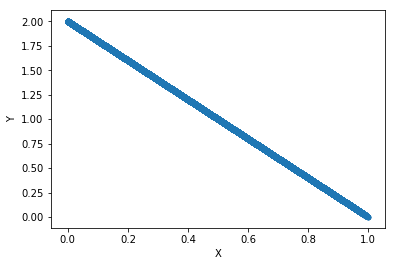

In [29]:
def plot_2_one_minus_t(size=int(1e6)):
    y = np.random.uniform(size=size)
    # inverse of the cdf
    t = (1- (1-y)**0.5)
    Y = 2*(1 - t)
    df = pd.DataFrame({'X': t, 'Y': Y})
    df.plot.scatter(x='X', y='Y')

plot_2_one_minus_t()

In [ ]:
# are you supposed to do something else

# How to get the area from 0 to 0.2
# Integrate the density function from 0 to 0.2

def F_X_t(t):
    size = int(1e6)
    one_minus_t(size=size)
    df = pd.DataFrame({'F_X(t)': 2*t-one_minus_t(size=size)**2})
    return df[df['F_X(t)'] < t].shape[0] / size

F_X_t(0.2)

## 8. Consider the following game. A dart will hit the random point $Y$ in $(0,1)$ according to the density $f_Y(t) = 2t$. You must guess the value of $Y$. (Your guess is a constant, not random.) You will lose $\$2$ per unit error if $Y$ is to the left of your guess, and will lose $\$1$ per unit error on the right. Find best guess in terms of expected loss.

Here is the loss function:

\begin{equation}
  \begin{aligned}
    L(g)&=\left\{
        \begin{array}{ll}
          2(g-t), \text{ if } t \leq g\\
          t-g, \text{ if } g < t\\
        \end{array}
      \right.\\
  \end{aligned}
\end{equation}

With that, we could then calculate expected loss: 

\begin{equation}
  \begin{aligned}
EL(g) &= \int_0^g 2t[2(g-t)]dt + \int_g^1 2t[t-g] dt \\
      &= \int_0^g 4t(g-t)dt + \int_g^1 (2t^2-2tg) dt \\
      &= \int_0^g (4tg-4t^2)dt + \left(\frac{2t^3}{3}-t^2g\right)\Big\vert_g^1  \\
      &= \left(2t^2g-\frac{4}{3}t^3\right)\Big\vert_0^g + \left(\frac{2}{3}-g\right) - \left(\frac{2g^3}{3} - g^3\right) \\
      &= 2g^3 - \frac{4}{3}g^3 + \frac{2}{3} - g - \frac{2g^3}{3} + g^3 \\
      &= \frac{2}{3} - g + g^3 \\
  \end{aligned}
\end{equation}

Let's look at the the first derivative and set it to 0 to find out local minimums and maximums. We are interested in finding the local minimum (i.e. best guess).

\begin{equation}
  \begin{aligned}
    \frac{d}{dg}EL(g) &= 3g^2 - 1 \\
    0 &= 3g^2 -1 && \text{ Set first derivative to 0 to find out local minimum/maximum } \\
    \frac{1}{3} &= g^2 \\
    \sqrt{\frac{1}{3}} &= g \\
    &\approx 0.577
  \end{aligned}
\end{equation}

To test whether or not that point is actually a local minimum or maximum, we could look at the second derivative and see whether or not it is positive or negative:

\begin{equation}
  \begin{aligned}
    \frac{d^2}{dg^2}EL(g) &= 6g \\
    &= 6\sqrt{\frac{1}{3}} \\
    &\approx 3.46 \\
    0 &< 3.46 && \text{must be a local minimum (i.e. best guess)!}
  \end{aligned}
\end{equation}


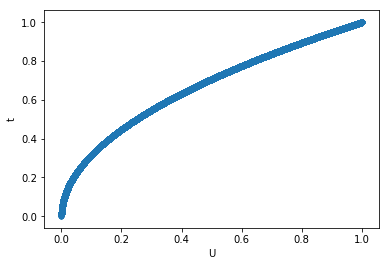

In [207]:
def plot_sqrt_u(size=int(1e6)):
    
    U = np.random.uniform(size=int(size))
    # inverse of the cdf
    t = U**0.5
    
    #Y = 2*t
    df = pd.DataFrame({'U': U, 't': t})
    df.plot.scatter(x='U', y='t')

plot_sqrt_u()

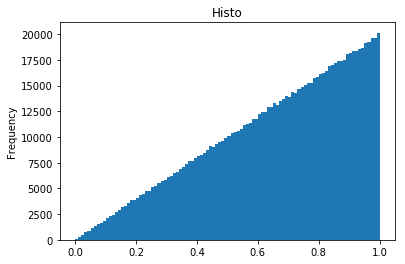

In [243]:
def plot_histo_sqrt_u(size=int(1e6)):
    
    U = np.random.uniform(size=int(size))
    # inverse of the cdf
    t = U**0.5
    
    #Y = 2*t
    df = pd.DataFrame({'U': U, 't': t})
    df['t'].plot.hist(bins=100,title='Histo')
    # There are more and more t's as t increases (linear)

plot_histo_sqrt_u()

In [270]:
def simulate_dart_throw(size=1e6, guess=0):
    U = np.random.uniform(size=int(size))
    #print(U.max())
    # Use inverse of the cdf to generate values from Y=2t.
    Y = U**0.5

    df = pd.DataFrame({'Y': Y, 'guess': guess, 'Y-g': Y-guess})

    
    def loss_function(x):
        if x > 0.0:
            return x
        else:
            return 2*np.abs(x)
            
    df['loss'] = df['Y-g'].apply(loss_function)
    
    #print(df)
    
    return df

# Loss is minimized when guess is 1. 
# Intuitively this makes sense. The higher the value of t, 
# the more likely t is represented. Differences in t and 
# the guess are tinier, even though we are doubling them 
# (because the guess will almost always be to the right of t)

simulate_dart_throw(guess=1).mean()

Y        0.666816
Y-g     -0.333184
guess    1.000000
loss     0.666369
dtype: float64

In [271]:
simulate_dart_throw(guess=0).mean()

Y        0.66652
Y-g      0.66652
guess    0.00000
loss     0.66652
dtype: float64

## When $g\approx0.577$, then $EL(g)= 0.577^3 - 0.577 + 2/3 \approx 0.28176$:

In [285]:
simulate_dart_throw(guess=0.577).mean()

Y        0.666875
Y-g      0.089875
guess    0.577000
loss     0.281561
dtype: float64

## 9. Density functions for continuous random variables are analogs of the ______ functions that are used for discrete random variables.

### Ans: mass

## 10. Suppose for some random variable $W$, $F_W(t) = t^3$ for $0 < t < 1$, with $F_W(t)$ being $0$ and $1$ for $t<0$ and $t>1$, respectively. Find $f_W(t)$ for $0<t<1$.


\begin{equation}
  \begin{aligned}
    F_W(t) &= t^3 \\
    \frac{d}{dt} F_W(t) &= \frac{d}{dt} t^3 \\
    f_W(t) &= 3t^2 && \text{for } 0<t<1 \\
  \end{aligned}
\end{equation}


11. Consider the density fZ(t) = 2t/15 for 1 < t < 4 and 0 elsewhere. Find the median of Z, as well as Z’s third moment, E(Z3), and its third central moment, E[(Z − EZ)3].